# Undersampling the pixel tables

In [3]:
import os
import re
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

data = pathlib.Path().absolute() / 'data'
images = pathlib.Path().absolute() / 'images'
label_regex = re.compile(r'(.*)\d\.txt')

In [4]:
if not images.exists():
    images.mkdir()

In [5]:
fin = [f for f in os.listdir(data) if '1.txt' in f]
dfs = [pd.read_csv(data / f, delimiter='\t') for f in fin]

In [6]:
dfs[0].sample(7)

,Pixel-X,Pixel-Y,Longitude,Latitude,Gamma0_VH,Gamma0_VV,elevation,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,collocationFlags
8438672,8561.5,6308.5,45.781672,61.368945,0.025382,0.174345,198.24327,6.868758,0.0009,0.0094,0.0210,0.0112,0.0395,0.1330,0.1617,0.1594,0.1644,0.0680,0.0300,1
7975170,8356.5,4826.5,45.764750,61.433192,0.040634,0.176389,148.36122,4.340952,0.0067,0.0197,0.0306,0.0169,0.0589,0.2296,0.2826,0.2712,0.2286,0.1094,0.0480,1
1860553,2865.5,3351.5,45.269031,61.498918,0.034845,0.195468,155.91203,5.609704,0.0042,0.0125,0.0310,0.0150,0.0461,0.1682,0.1974,0.2383,0.1925,0.0889,0.0395,1
6194476,6364.5,2637.5,45.586504,61.528828,0.032961,0.213107,165.39696,6.465503,0.0053,0.0133,0.0235,0.0126,0.0388,0.1513,0.1758,0.1983,0.2134,0.0873,0.0424,1
2255582,2826.5,4234.5,45.265174,61.460705,0.035315,0.185323,131.89389,5.247653,0.0043,0.0123,0.0251,0.0154,0.0395,0.1429,0.1627,0.1738,0.1977,0.0735,0.0337,1
6930628,6963.5,3619.5,45.639930,61.486082,0.041257,0.161276,177.94865,3.909062,0.0091,0.0171,0.0383,0.0172,0.0644,0.2505,0.3117,0.3317,0.3238,0.1238,0.0532,1
2579676,3451.5,2700.5,45.322396,61.526980,0.050274,0.173446,194.53172,3.450030,0.0032,0.0103,0.0245,0.0119,0.0446,0.1605,0.1924,0.1904,0.2605,0.0821,0.0373,1


In [7]:
columns_to_drop = [
    'Pixel-X',
    'Pixel-Y',
    'Longitude',
    'Latitude',
    'elevation',
    'collocationFlags'
]

for f, df in zip(fin, dfs):
    df.drop(columns_to_drop, axis=1, inplace=True)
    df['Class'] = label_regex.findall(f)[0]

dfs[0].sample(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
4080811,0.035720,0.230428,6.451027,0.0073,0.0127,0.0301,0.0131,0.0548,0.1930,0.2357,0.2225,0.2707,0.0890,0.0384,spruce
2376442,0.043139,0.155365,3.601515,0.0001,0.0052,0.0191,0.0072,0.0315,0.1088,0.1304,0.1567,0.1732,0.0618,0.0268,spruce
8706113,0.034406,0.225148,6.543854,0.0025,0.0113,0.0260,0.0120,0.0480,0.2137,0.2568,0.2783,0.2712,0.1027,0.0421,spruce
7843162,0.039528,0.232475,5.881319,0.0074,0.0165,0.0302,0.0153,0.0546,0.2040,0.2523,0.2626,0.2160,0.1029,0.0446,spruce
8797165,0.031722,0.178654,5.631831,0.0016,0.0129,0.0235,0.0104,0.0444,0.1735,0.2198,0.2138,0.1995,0.0802,0.0334,spruce
9424217,0.029530,0.183244,6.205239,0.0015,0.0114,0.0185,0.0083,0.0373,0.1394,0.1635,0.1706,0.1867,0.0675,0.0276,spruce
8212562,0.023846,0.165530,6.941590,0.0117,0.0172,0.0393,0.0221,0.0904,0.2737,0.3183,0.3200,0.3132,0.1685,0.0783,spruce


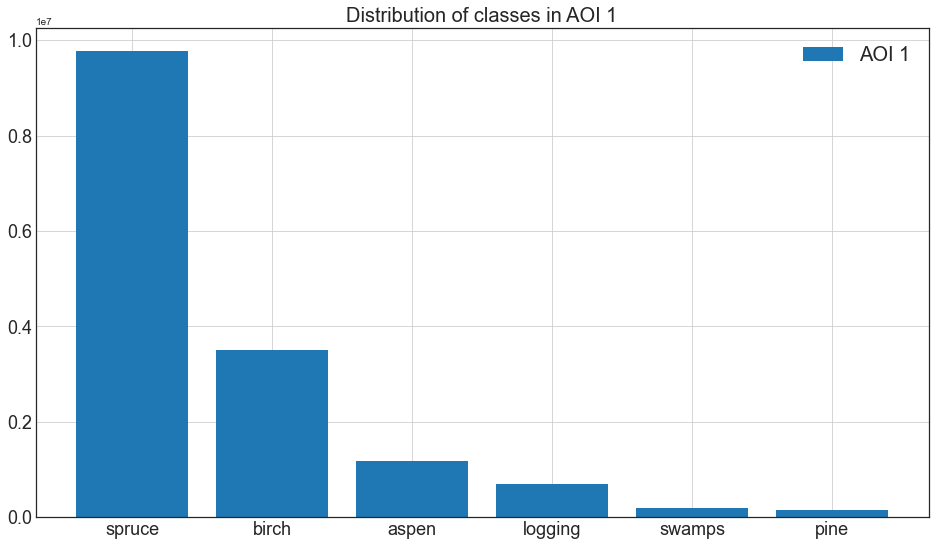

In [8]:
dfs.sort(key=lambda df: -df.shape[0])

sizes1 = [df.shape[0] for df in dfs]
labels1 = [df.iloc[0, -1] for df in dfs]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(range(len(sizes1)), sizes1, label='AOI 1')

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes1))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels1))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes in AOI 1', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_1.svg')

In [9]:
test_df_from_aoi2 = pd.read_csv(data / 'birch2.txt', delimiter='\t', nrows=10)
test_df_from_aoi2.sample(7)

,Pixel-X,Pixel-Y,Longitude,Latitude,Gamma0_VH,Gamma0_VV,elevation,Gamma0_Ratio,B1,B2,...,B11,B12,collocationFlags,pixel_classif_flags,sun_zenith,view_zenith_mean,sun_azimuth,view_azimuth_mean,elevation_S,collocationFlags1
0,9111.5,9299.5,46.471186,61.887009,0.021960,0.129485,119.74301,5.896361,0.0023,0.0142,...,0.1189,0.0463,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
1,9112.5,9299.5,46.471278,61.887008,0.021703,0.127020,120.55371,5.852583,0.0023,0.0145,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
2,9113.5,9299.5,46.471369,61.887007,0.021927,0.119369,121.36441,5.443820,0.0023,0.0145,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
6,9117.5,9299.5,46.471736,61.887003,0.028465,0.119370,124.18844,4.193485,0.0023,0.0133,...,0.1110,0.0431,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
3,9114.5,9299.5,46.471461,61.887006,0.022836,0.115703,122.17511,5.066628,0.0023,0.0133,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
9,9120.5,9299.5,46.472011,61.887000,0.032576,0.127492,124.18844,3.913728,0.0016,0.0130,...,0.1117,0.0447,1,140416,50.202740,3.323232,172.16760,310.1304,118.27179,1
8,9119.5,9299.5,46.471920,61.887001,0.031637,0.125306,124.18844,3.960819,0.0023,0.0121,...,0.1110,0.0431,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1


In [10]:
columns_to_drop = [
    'Pixel-X',
    'Pixel-Y',
    'Longitude',
    'Latitude',
    'elevation',
    'collocationFlags',
    'pixel_classif_flags',
    'sun_zenith',
    'view_zenith_mean',
    'sun_azimuth',
    'view_azimuth_mean',
    'elevation_S',
    'collocationFlags1'
]

for i in range(1, len(dfs)):
    label = dfs[i].iloc[0, -1]
    from_aoi2 = pd.read_csv(data / f'{label}2.txt', delimiter='\t')
    from_aoi2.drop(columns_to_drop, axis=1, inplace=True)
    from_aoi2['Class'] = label
    dfs[i] = dfs[i].append(from_aoi2, ignore_index=True)

In [11]:
dfs[2].head(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
0,0.039911,0.148972,3.732553,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
1,0.039702,0.143631,3.617693,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
2,0.044944,0.150328,3.344822,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
3,0.048118,0.155936,3.240724,0.009,0.0166,0.0240,0.0187,0.0429,0.0971,0.1088,0.1222,0.196,0.0875,0.0470,aspen
4,0.035483,0.136933,3.859139,0.009,0.0141,0.0199,0.0144,0.0311,0.0868,0.1088,0.1297,0.196,0.0684,0.0331,aspen
5,0.036123,0.138709,3.839909,0.009,0.0141,0.0199,0.0144,0.0311,0.0868,0.1088,0.1297,0.196,0.0684,0.0331,aspen
6,0.039702,0.143631,3.617693,0.009,0.0155,0.0215,0.0133,0.0429,0.0971,0.1088,0.1332,0.196,0.0875,0.0470,aspen


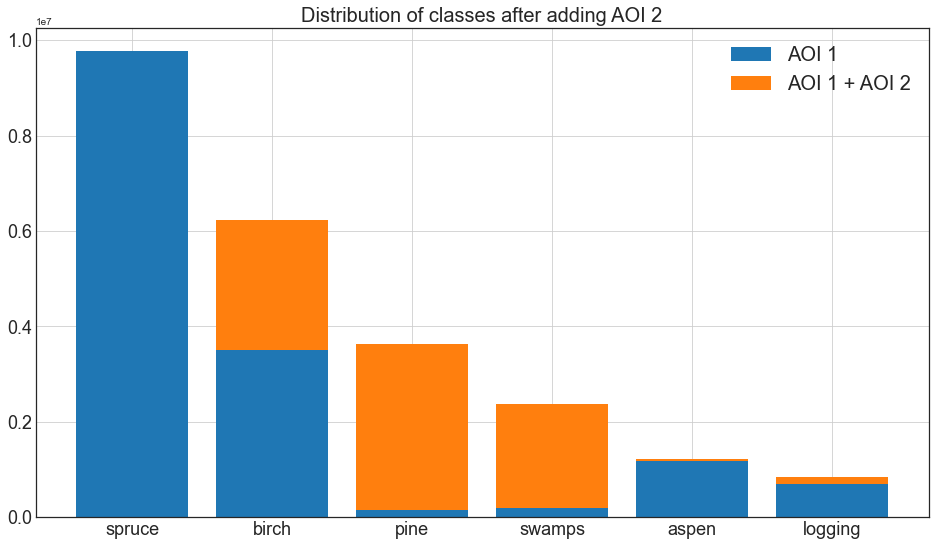

In [12]:
dfs.sort(key=lambda df: -df.shape[0])

sizes2 = [df.shape[0] for df in dfs]
labels2 = [df.iloc[0, -1] for df in dfs]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar([labels2.index(l) for l in labels1], sizes1, label='AOI 1', zorder=2)
ax.bar(range(len(sizes2)), sizes2, label='AOI 1 + AOI 2', zorder=1)

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes2))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels2))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes after adding AOI 2', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_2.svg')

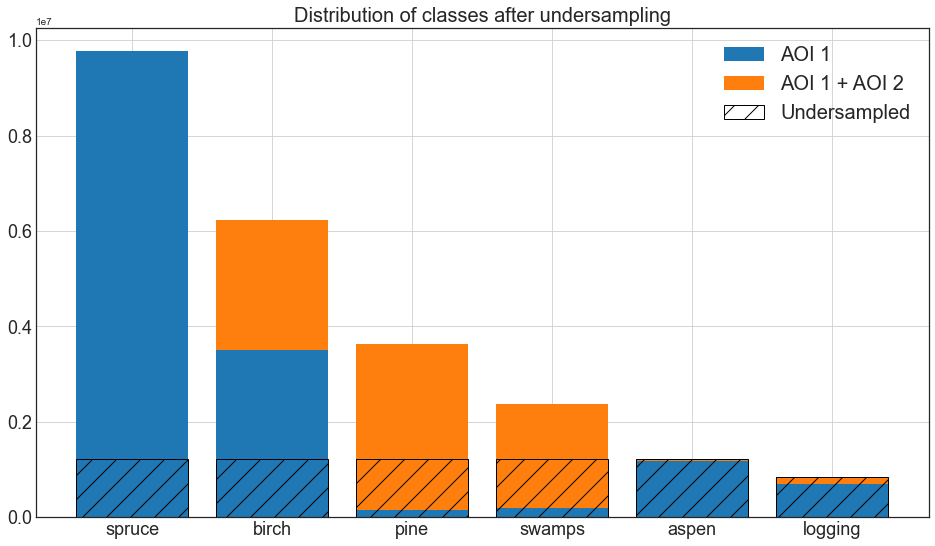

In [13]:
samples = dfs[-2].shape[0]

undersampled = []

for df in dfs:
    undersampled.append(df.iloc[:samples, :])

undersampled.sort(key=lambda df: -df.shape[0])

sizes3 = [df.shape[0] for df in undersampled]
labels3 = [df.iloc[0, -1] for df in undersampled]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar([labels2.index(l) for l in labels1], sizes1, label='AOI 1', zorder=2)
ax.bar(range(len(sizes2)), sizes2, label='AOI 1 + AOI 2', zorder=1)
ax.bar(range(len(sizes3)), sizes3, label='Undersampled', zorder=3, hatch='/', edgecolor='k', color='None')

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes2))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels2))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes after undersampling', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_undersampled.svg')

In [14]:
undersampled_df = pd.concat(undersampled)
undersampled_df = undersampled_df.sample(frac=1)

In [15]:
undersampled_df.head(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
1175753,0.030194,0.173001,5.729707,0.0073,0.0145,0.0359,0.0165,0.0609,0.2323,0.2772,0.3118,0.3260,0.1108,0.0456,birch
851319,0.031460,0.152816,4.857488,0.0097,0.0160,0.0340,0.0185,0.0629,0.2898,0.3669,0.3759,0.3463,0.1453,0.0597,birch
223163,0.032945,0.156986,4.765104,0.0065,0.0128,0.0248,0.0107,0.0401,0.1531,0.1923,0.2212,0.2715,0.0710,0.0307,birch
412018,0.028466,0.236438,8.305885,0.0003,0.0097,0.0241,0.0117,0.0456,0.1876,0.2348,0.2470,0.2675,0.0914,0.0371,spruce
745514,0.049960,0.234735,4.698456,0.0047,0.0144,0.0309,0.0134,0.0647,0.1939,0.2355,0.2074,0.2314,0.1060,0.0476,spruce
891571,0.034018,0.235378,6.919126,0.0108,0.0168,0.0326,0.0170,0.0624,0.2525,0.3129,0.3432,0.3867,0.1328,0.0560,birch
726934,0.035350,0.200699,5.677465,0.0060,0.0149,0.0338,0.0150,0.0533,0.1594,0.1940,0.2184,0.1974,0.0845,0.0408,pine


In [16]:
undersampled_df.to_csv(data / 'undersampled_shuffled.csv', index=False)